In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

class StatsChat_Zoom:
    def __init__(self, path=None):
        self.path = path
        self.records = None
        pass
    
    def read_file_record(self):
        if self.path is not None:
            with open(self.path, 'r') as file_record:
                self.records = file_record.readlines()
                print(self.records)
            return True
        return False
                
    # Convert records from raw input to records have type: time, from, to, message
    def extract_records(self):
        if self.records is not None:
            messages = {'time': [],'from': [], 'to': [], 'message': []}
            for record in self.records:
                data = record.split("From")
                if len(data) == 1:
                    self.records.remove(record)
                elif len(data) == 2:
                    messages['time'].append(data[0])
                    #messages['contents'].append(data[1])
                    detached_contents = data[1].split(':')
                    
                    peoples = detached_contents[0].split('To')
                    if len(peoples) == 2:
                        messages['from'] = peoples[0]
                        messages['to'] = peoples[1]
                    else:
                        messages['from'] = peoples[0]
                        messages['to'] = peoples[1]
                        
                    messages['messages'].append(detached_contents[1])
                # Standardlize input    
                i = len(messages['time']) - 1    
                messages['time'][i] = messages['time'][i].replace("\t", "").replace(" ", "").replace("\n","")
                messages['from'][i] = messages['from'][i].replace("\t", "").replace("\n","")
                messages['to'][i] = messages['to'][i].replace("\t", "").replace("\n","")
                messages['message'][i] = messages['message'][i].replace("\t", "").replace("\n", "")                

            self.records = messages
        else:
            return None
                    
    # Write records to file csv
    def convert_record(self):
        if self.records is not None:
            path = self.path.replace('txt', 'csv')
            with open(path, "w") as outfile:
                writter = csv.writer(outfile)
                writter.writerow(self.records.keys())
                writter.writerows(zip(*self.records.values()))
                
    def comunicate(self, n=1, color='blue'):
        path = self.path.replace('txt', 'csv')
        records = pd.read_csv(path)
        counts = records.groupby('from').count().reset_index()
        counts = counts.sort_values('time', ascending=False).head(n).reset_index()
        counts.plot(x='from', y='time', kind='bar', color=color)
        plt.show()
        
    @staticmethod
    def visualizing(path=None, color='blue', n=1):
        if path is None:
            return False
        records = pd.read_csv(path)
        counts = records.groupby('from').count().reset_index()
        counts = counts.sort_values('time', ascending=False).head(n).reset_index()
        counts.plot(x='from', y='time', kind='bar', color=color)
        plt.show()
        return True

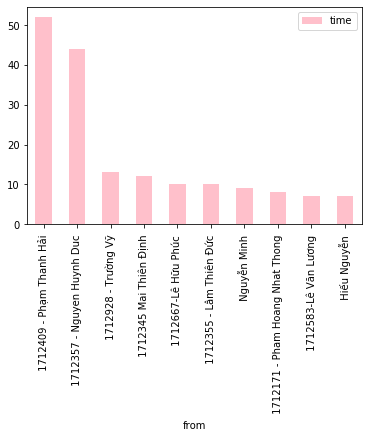

True

In [9]:
StatsChat_Zoom().visualizing('meeting.csv', color='pink', n=10)